<h1>Zebrafish Embryo Energetics</h1>

In [6]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
##check out tutorial here:
##http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb
#data= pd.read_csv('data/235C_combined.csv')
#data = pd.read_csv('data/285C_combined.csv')
data = pd.read_csv('data/335C_combined.csv')
#data= pd.read_csv('data/150627_23.5_WH.csv')
data.head()

,time,dp.x,dp.y,dp.x.1,dp.y.1,dp.x.2,dp.y.2,dp.x.3,dp.y.3,dp.x.4,dp.y.4
0,1,11.240423,11.085212,10.738853,10.779680,10.800126,10.844465,10.835734,10.770735,10.767771,10.731048
1,2,11.241147,11.084801,10.739540,10.779285,10.799950,10.844732,10.836566,10.770911,10.768112,10.730794
2,3,11.241405,11.084589,10.739913,10.778836,10.799792,10.845338,10.836654,10.770673,10.767991,10.730299
3,4,11.241813,11.084963,10.739793,10.779755,10.800435,10.846021,10.836864,10.770616,10.767938,10.731093
4,5,11.242237,11.085158,10.739793,10.778989,10.800739,10.846145,10.836776,10.770948,10.768035,10.730606


<h2>some analysis scratch notes here below (through to 1st fourier steps)</h2>

2951
10.7314669519
352
10065
            10             9           8             7             6
-5.158e-38 x  + 2.363e-33 x - 4.5e-29 x + 4.633e-25 x - 2.846e-21 x
              5             4             3             2
 + 1.122e-17 x - 3.131e-14 x + 6.358e-11 x - 7.526e-08 x + 7.193e-05 x + 0.689
10065
0.00180773724514
13
774.230769231


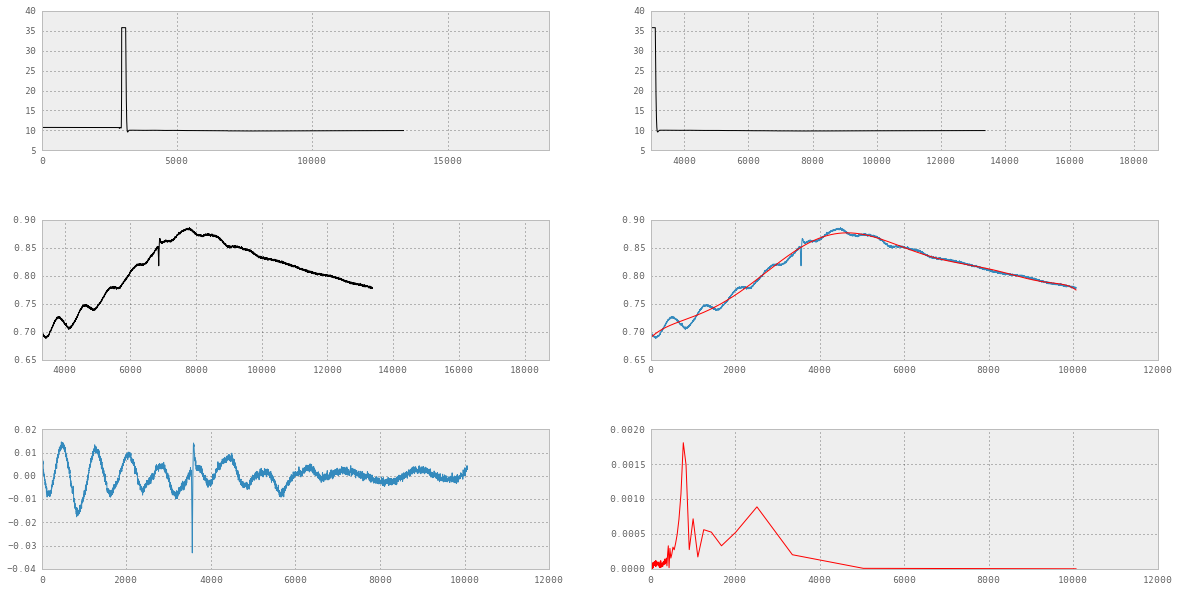

In [16]:
x = data['time']
y = data['dp.y.4']
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(3, 2, 1)
ax2 = fig1.add_subplot(3, 2, 2)
ax3 = fig1.add_subplot(3, 2, 3)
ax4 = fig1.add_subplot(3, 2, 4)
ax5 = fig1.add_subplot(3, 2, 5)
ax6 = fig1.add_subplot(3, 2, 6)

y.plot(ax = ax1 , style='k')
#r.plot(style='k')
#dy = pd.Series.diff(r)
#ddy = pd.Series.diff(dy)
#r.plot(style='k')
m = np.argmax(y)
yin_av = np.mean(y[:m/2])
print m
print yin_av
####

y[m:].plot(ax = ax2 , style='k')
###
z = y[m:]
z1 = pd.rolling_mean(z, 150)
k1 = argrelextrema(z1.values,np.less)[0] #local minima
s = yin_av-y[m+k1[0]:]
xs = x[m+k1[0]:]
s.plot( ax = ax3 ,  style='k')
print k1[0]


######
s1 = s[~np.isnan(s)]
print sum(~np.isnan(s))
xs = range(0,len(s1))
#plt.plot(xs,s1)
f = np.polyfit(xs, s1, 10)
p = np.poly1d(f)
ax4.plot(xs,s1,'-',xs,p(xs),'r-')
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
print p
###
osc = s1 - p(xs)
ax5.plot(xs,osc)
###

#https://plot.ly/matplotlib/fft/
Fs = 1
n = len(osc) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/float(T) # two sides frequency range
frq = frq[range(n/2)] # one side frequency range
Y = np.fft.fft(osc)/n # fft computing and normalization
Y = Y[range(n/2)]
print n
ax6.plot(1/frq,abs(Y),'r') # plotting the spectrum
print max(abs(Y))
print np.argmax(abs(Y))
print 1/frq[np.argmax(abs(Y))]


<h2> More notes </h2>

244


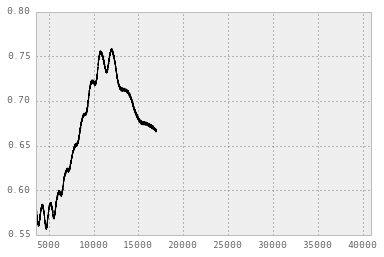

In [555]:
z = y[m:]
z1 = pd.rolling_mean(z, 150)
k1 = argrelextrema(z1.values,np.less)[0] #local minima
s = yin_av-y[m+k1[0]:]
xs = x[m+k1[0]:]
s.plot(style='k')
print k1[0]

13466


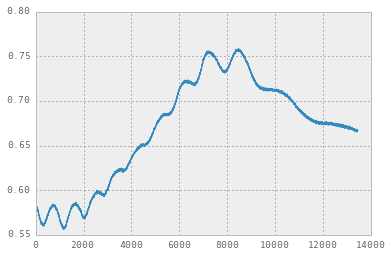

In [556]:
s1 = s[~np.isnan(s)]
print sum(~np.isnan(s))
xs = range(0,len(s1))
#plt.plot(xs,s1)


            10             9             8             7             6
-3.551e-39 x  + 2.585e-34 x - 8.014e-30 x + 1.376e-25 x - 1.426e-21 x
              5            4             3             2
 + 9.142e-18 x - 3.58e-14 x + 8.105e-11 x - 8.853e-08 x + 3.648e-05 x + 0.5688


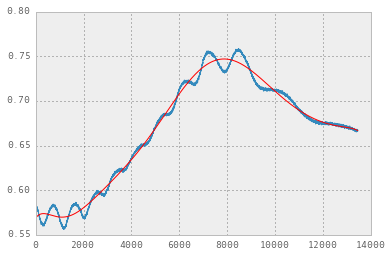

In [557]:
f = np.polyfit(xs, s1, 10)
p = np.poly1d(f)
plt.plot(xs,s1,'-',xs,p(xs),'r-')
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
print p

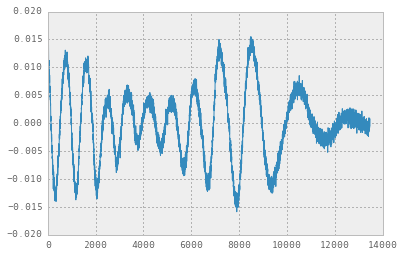

In [558]:
osc = s1 - p(xs)
plt.plot(xs,osc)

13466
0.00162058115022
15
897.733333333


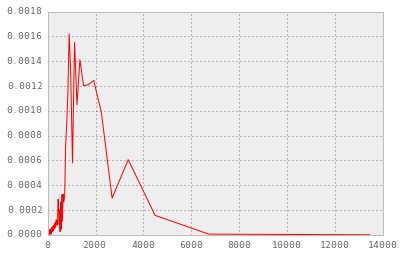

In [559]:
#https://plot.ly/matplotlib/fft/
Fs = 1
n = len(osc) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/float(T) # two sides frequency range
frq = frq[range(n/2)] # one side frequency range
Y = np.fft.fft(osc)/n # fft computing and normalization
Y = Y[range(n/2)]
print n
plt.plot(1/frq,abs(Y),'r') # plotting the spectrum
print max(abs(Y))
print np.argmax(abs(Y))
print 1/frq[np.argmax(abs(Y))]

[  0.00000000e+00   5.51553045e-09   1.10310609e-08 ...,   3.71195200e-05
   3.71250355e-05   3.71305510e-05]
[ -4.51397431e-09 +0.00000000e+00j  -4.38368166e-06 +6.55225316e-05j
   9.22385136e-03 -7.25592294e-02j ...,  -3.44239313e-01 -2.08539139e+00j
   9.22385136e-03 +7.25592294e-02j  -4.38368167e-06 -6.55225316e-05j]


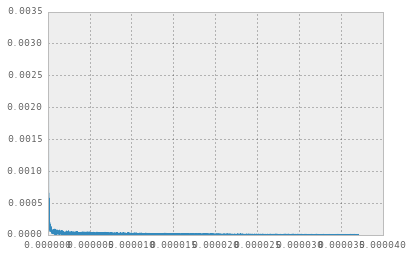

In [308]:
from scipy import fft, arange
Fs = 1 # sampling rate
N = len(osc) # length of the signal
T = n/Fs
yf = fft(osc)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
print xf
print yf

# frq = k/T # two sides frequency range
# frq = frq[range(n/2)] # one side frequency range

# Y = fft(osc)/n # fft computing and normalization
# Y = Y[range(n/2)]
# plt.plot(frq,abs(Y),'r') # plotting the spectrum
# print n
# print max(frq)


# from scipy.fftpack import fft
# >>> # Number of samplepoints
# >>> N = 600
# >>> # sample spacing
# >>> T = 1.0 / 800.0
# >>> x = np.linspace(0.0, N*T, N)
# >>> y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
# >>> yf = fft(y)
# >>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
# >>> import matplotlib.pyplot as plt
# >>> plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
# >>> plt.grid()
# >>> plt.show()

In [234]:
#http://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
import scipy.fftpack

# N = 100
# x = np.linspace(0,2*np.pi,N)
# y = np.sin(x) + np.random.random(N) * 0.2

w = scipy.fftpack.rfft(osc)
f = scipy.fftpack.rfftfreq(len(s), x[1]-x[0])
spectrum = w**2

cutoff_idx = spectrum < (spectrum.max()/5)
w2 = w.copy()
w2[cutoff_idx] = 0

y2 = scipy.fftpack.irfft(w2)

[1089 1165 1187 1209 1228 1253 1271 1274 1323 1343 1352 1356 1362 1367 1392
 1400 1408 1413 1421 1424]


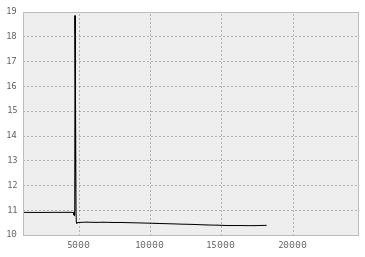

In [83]:
##newish



r = pd.rolling_mean(y, 500)
dys = pd.rolling_mean(dy,1000)
k1 = argrelextrema(r.values,np.less)[0] #local minima
print k1[0:20]
y[k1[0]:].plot(style='k')


k = argrelextrema(r.values,np.greater)[0] #local maxima
#print k[0:10]
#y[k[0]:].plot(style='k')

In [ ]:
#plt.plot(x[ind:] , z)
dz = np.diff(z)
len(y[ind:])
#plt.plot(x[ind:-1],dz)
n = np.argmax(abs(dz) < 1e-5)
plt.plot(x[ind+n:],z[n:])

In [ ]:
r = pd.rolling_mean(z, 200)
r.plot(style='k')
np.argmin(r)
from scipy.signal import argrelextrema
k = argrelextrema(r.values,np.less)[0][0]
print k

In [ ]:
kmax = argrelextrema(r.values,np.greater)[0][0]
print kmax
z[kmax:].plot(style='k')

2398

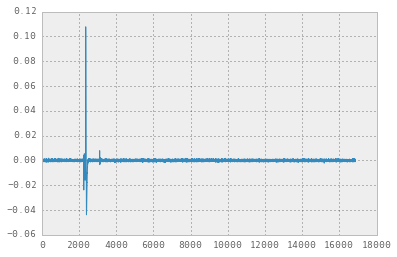

In [15]:
y = data['y151020']
x = data['time']
#y.plot(style='k')
# dy = np.diff(y)
plt.plot(x[:-1],dy[:])
# #y
ind = np.argmin(dy[~np.isnan(dy)])
ind
# dy[ind]
# #min(dy)
# ind
# z = y[ind:]

# r = pd.rolling_mean(z, 200)
# #r.plot(style='k')
# np.argmin(r)
# from scipy.signal import argrelextrema
# k = argrelextrema(r.values,np.less)[0][0]
# print k
# kmax = argrelextrema(r.values,np.greater)[0][0]
# print kmax
# z[kmax:].plot(style='k')

In [ ]:
x = np.random.random(12)

# for local maxima
argrelextrema(x, np.less)
type(z)

In [ ]:
ddz = np.diff(dz)
plt.plot(x[ind:-2],ddz)
abs(ddz

In [ ]:
ind = np.argmax(dz[~np.isnan(dz)])
ind

In [ ]:
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,y,'-',x,p(x),'r-')
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

In [ ]:
data1= pd.read_csv('data/150627_23.5_WH.csv')
t = 850
plt.plot(data1['time'][1:t],data1['dp'][1:t])

In [ ]:
data1.head()